# WE11 - Autoencoder

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

### Load the pretrained model and MNIST dataset

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist


pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

2023-04-27 14:34:09.664481: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


### Predict and compare:

313/313 [==============================] - 1s 3ms/step


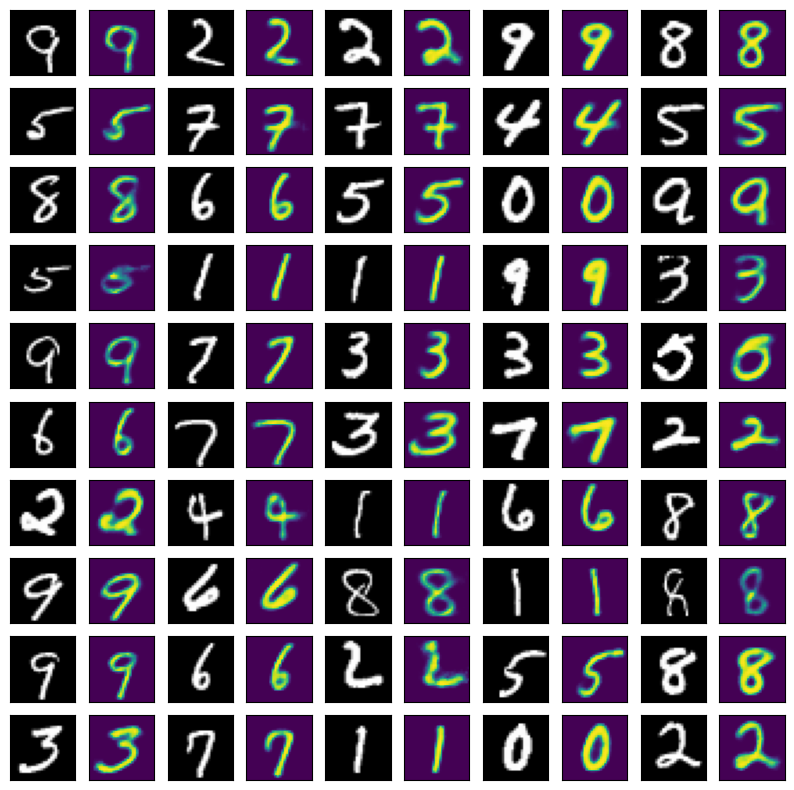

In [3]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in np.random.randint(len(test_images), size=(50)):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

## New autoencoder

Create a new autoencoder, and train this autoencoder with the MNIST dataset, with your new images added (don't forget to oversample these images. Add enough copies to the MNIST dataset so that your model can identify your new character).

### Load my 5 new images

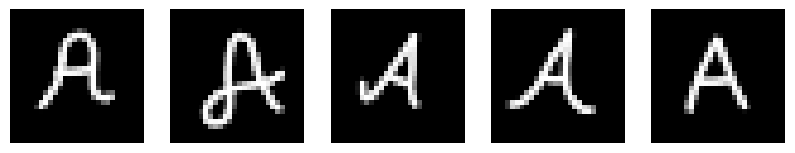

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


# load the five images
new_images = []
for i in range(1,6):
    new_images.append(tf.keras.utils.load_img(f'A{i}.png', target_size=(28, 28), color_mode = "grayscale"))

# display the images side by side
fig, axs = plt.subplots(1,5, figsize = (10,5))

for j in range(5):
    axs[j].axis('off')
    axs[j].imshow(new_images[j], cmap = "gray")


In [5]:

np.random.shuffle(train_images)

bad_images = [(tf.keras.utils.img_to_array(new_images[m])/ 255).reshape(784) for m in range(5) for _ in range(35)] #oversampling
new_image_set = np.vstack((train_images[:1000], bad_images)) #after shuffling choose the first 1000 images (small dataset) and include the new images
np.random.shuffle(new_image_set)

new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

In [6]:
updated_model = keras.models.load_model('initially_trained_autoencoder.h5')

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

Epoch 1/15
2/2 [==============================] - 1s 406ms/step - loss: 0.1039 - val_loss: 0.1019
Epoch 2/15
2/2 [==============================] - 0s 74ms/step - loss: 0.0981 - val_loss: 0.0996
Epoch 3/15
2/2 [==============================] - 0s 120ms/step - loss: 0.0937 - val_loss: 0.0982
Epoch 4/15
2/2 [==============================] - 0s 144ms/step - loss: 0.0901 - val_loss: 0.0970
Epoch 5/15
2/2 [==============================] - 0s 159ms/step - loss: 0.0871 - val_loss: 0.0963
Epoch 6/15
2/2 [==============================] - 0s 75ms/step - loss: 0.0845 - val_loss: 0.0953
Epoch 7/15
2/2 [==============================] - 0s 76ms/step - loss: 0.0818 - val_loss: 0.0942
Epoch 8/15
2/2 [==============================] - 0s 96ms/step - loss: 0.0794 - val_loss: 0.0934
Epoch 9/15
2/2 [==============================] - 0s 153ms/step - loss: 0.0777 - val_loss: 0.0929
Epoch 10/15
2/2 [==============================] - 0s 98ms/step - loss: 0.0757 - val_loss: 0.0927
Epoch 11/15
2/2 [=======

### Test the model on the original test set

313/313 [==============================] - 2s 5ms/step


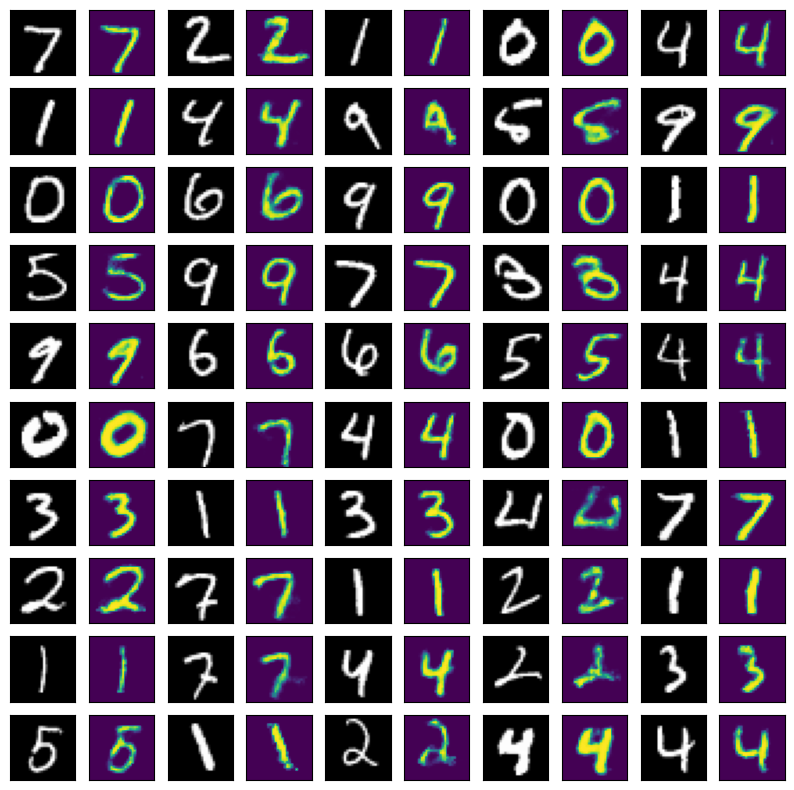

In [7]:
reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(50):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Test the model on the new test set

In [8]:
input_arr = np.array([(tf.keras.utils.img_to_array(new_images[m])/ 255).reshape(784) for m in range(5)])

predictions = updated_model.predict(input_arr)
print(predictions.shape)


1/1 [==============================] - 0s 21ms/step
(5, 784)


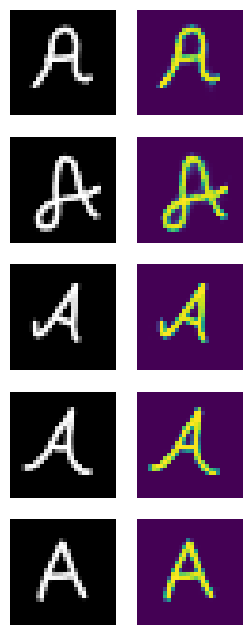

In [9]:
# display the images side by side
fig, axs = plt.subplots(5,2, figsize = (3,8))

for j in range(5):
    axs[j,0].axis('off')
    axs[j,0].imshow(new_images[j], cmap = "gray")
    axs[j,1].axis('off')
    axs[j,1].imshow(predictions[j].reshape(28,28))



## Prediction from previous autoencoder

1/1 [==============================] - 0s 22ms/step
(5, 784)


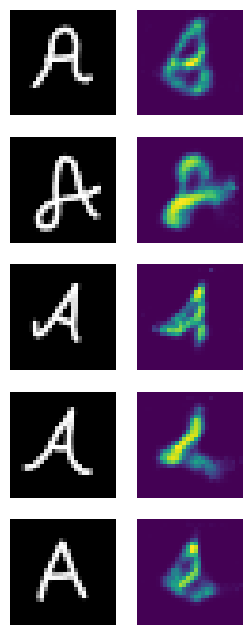

In [10]:
input_arr = np.array([(tf.keras.utils.img_to_array(new_images[m])/ 255).reshape(784) for m in range(5)])

predictions = pretrained_model.predict(input_arr)
print(predictions.shape)
# display the images side by side
fig, axs = plt.subplots(5,2, figsize = (3,8))

for j in range(5):
    axs[j,0].axis('off')
    axs[j,0].imshow(new_images[j], cmap = "gray")
    axs[j,1].axis('off')
    axs[j,1].imshow(predictions[j].reshape(28,28))

# A saved version of my retrained autoencoder 

In [11]:
updated_model.save('retrained_autoencoder.h5')